In [1]:
import scSherlock as sh
import scanpy as sc

/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load the data
adata = sc.read_h5ad('/home/croizer/Documents/02_Analysis/02_scSherlock/hao_2021_SCT.h5ad')
cell_type_column = "celltype.l3"
patient_column = "donor"


/home/croizer/.local/lib/python3.10/site-packages/anndata/compat/__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25, 100],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)

2025-04-01 11:17:20,247 - ScSherlock - INFO - Pre-filtering genes...
2025-04-01 11:17:20,253 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (161764, 20729) data matrix


In [4]:
annotation_columns = ['celltype.l1', 'celltype.l2', 'celltype.l3']
scherlock.create_hierarchy_graph(annotation_columns)

In [1]:
fig = scherlock.visualize_hierarchy()


NameError: name 'scherlock' is not defined

In [7]:
scherlock.run('theoric')

2025-04-01 11:21:33,229 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 464/464 [00:00<00:00, 563.62it/s]
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
2025-04-01 11:21:59,649 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-01 11:21:59,651 - ScSherlock - INFO - Applying multi-category correction...
2025-04-01 11:21:59,744 - ScSherlock - INFO - Aggregating scores...
2025-04-01 11:21:59,844 - ScSherlock - INFO - Sorting scores...
2025-04-01 11:22:00,011 - ScSherlock - INFO - Identifying top markers...


{'CD14 Mono': 'HP',
 'CD4 TCM_1': 'AC025917.1',
 'CD8 Naive': 'SFRP5',
 'NK_2': 'ERFE',
 'CD8 TEM_1': 'AL050344.1',
 'CD16 Mono': 'ZBTB7C',
 'B intermediate lambda': 'AC098484.2',
 'CD4 Naive': 'AC000032.1',
 'B naive kappa': 'SYN3',
 'CD4 TCM_3': 'SLC44A3',
 'MAIT': 'ROR2',
 'CD4 TCM_2': 'FOXB1',
 'CD8 TEM_2': 'TMEM249',
 'gdT_3': 'CYP24A1',
 'NK_1': 'VSTM2B',
 'CD8 TCM_1': 'CUZD1',
 'dnT_2': 'MIR4422HG',
 'B intermediate kappa': 'SEMA3D',
 'B memory kappa': 'MUC16',
 'Doublet': 'AC133550.1',
 'pDC': 'ASIP',
 'CD8 TEM_5': 'AC007405.3',
 'gdT_1': 'TRDV2',
 'B naive lambda': 'OR13A1',
 'NK_4': 'AL929472.2',
 'CD8 Proliferating': 'MT1G',
 'CD8 TCM_2': 'CLC',
 'Treg Naive': 'LINC02312',
 'Plasma': 'UCHL1',
 'CD4 TEM_1': 'ZNF541',
 'Treg Memory': 'HAP1',
 'CD4 TEM_3': 'GLT8D2',
 'CD8 TCM_3': 'SLC25A30-AS1',
 'cDC2_1': 'TMEM217',
 'NK Proliferating': 'ILDR2',
 'CD8 TEM_4': 'HOXC5',
 'ASDC_pDC': 'AC068987.4',
 'B memory lambda': 'EYA2',
 'HSPC': 'CD34',
 'cDC2_2': 'CD207',
 'Platelet': 'AVPR

2025-04-01 11:23:01,728 - ScSherlock - INFO - Using theoretical marker scores for visualization


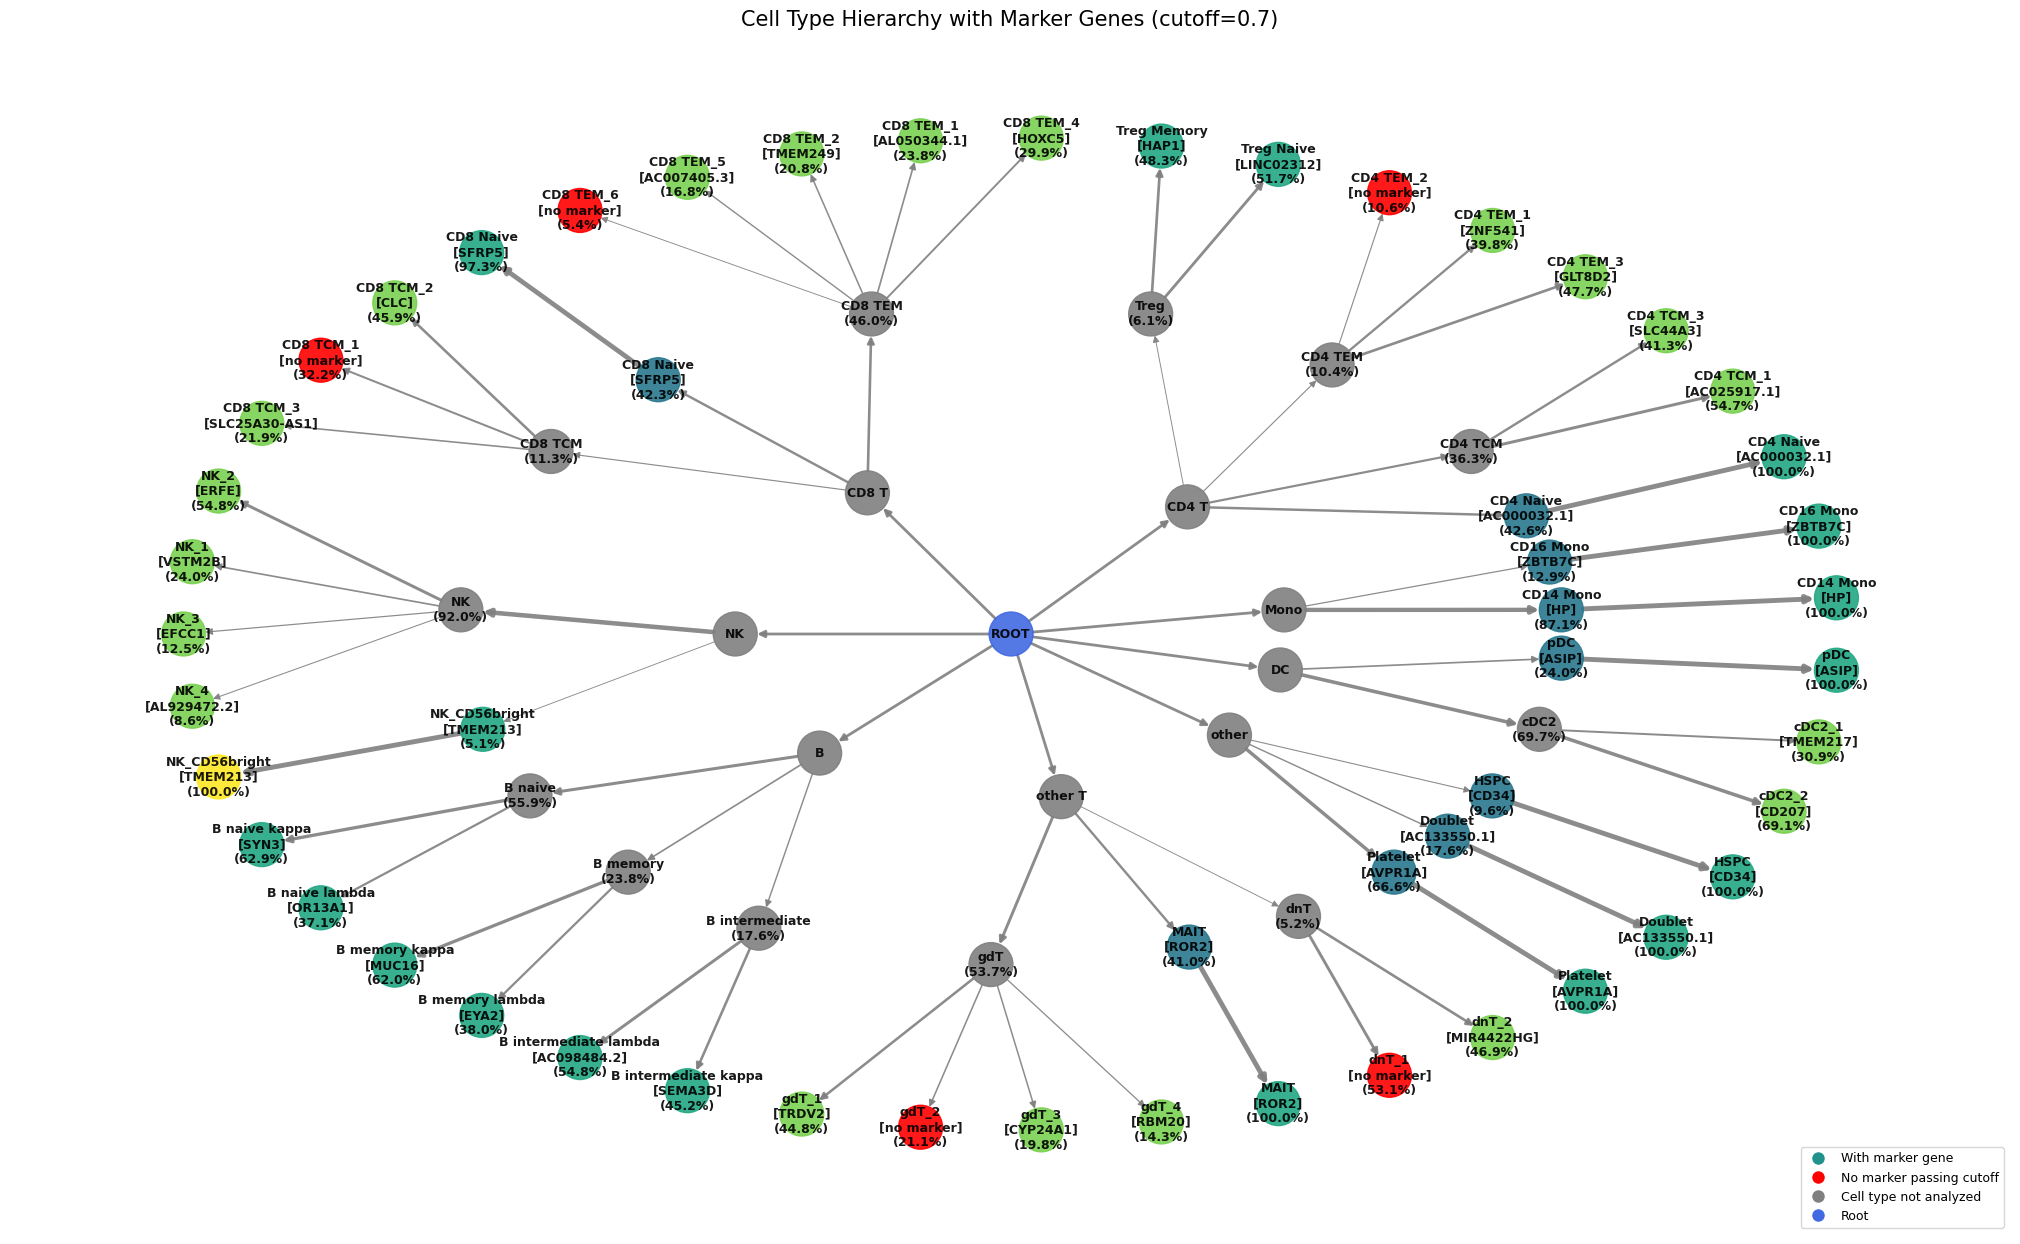

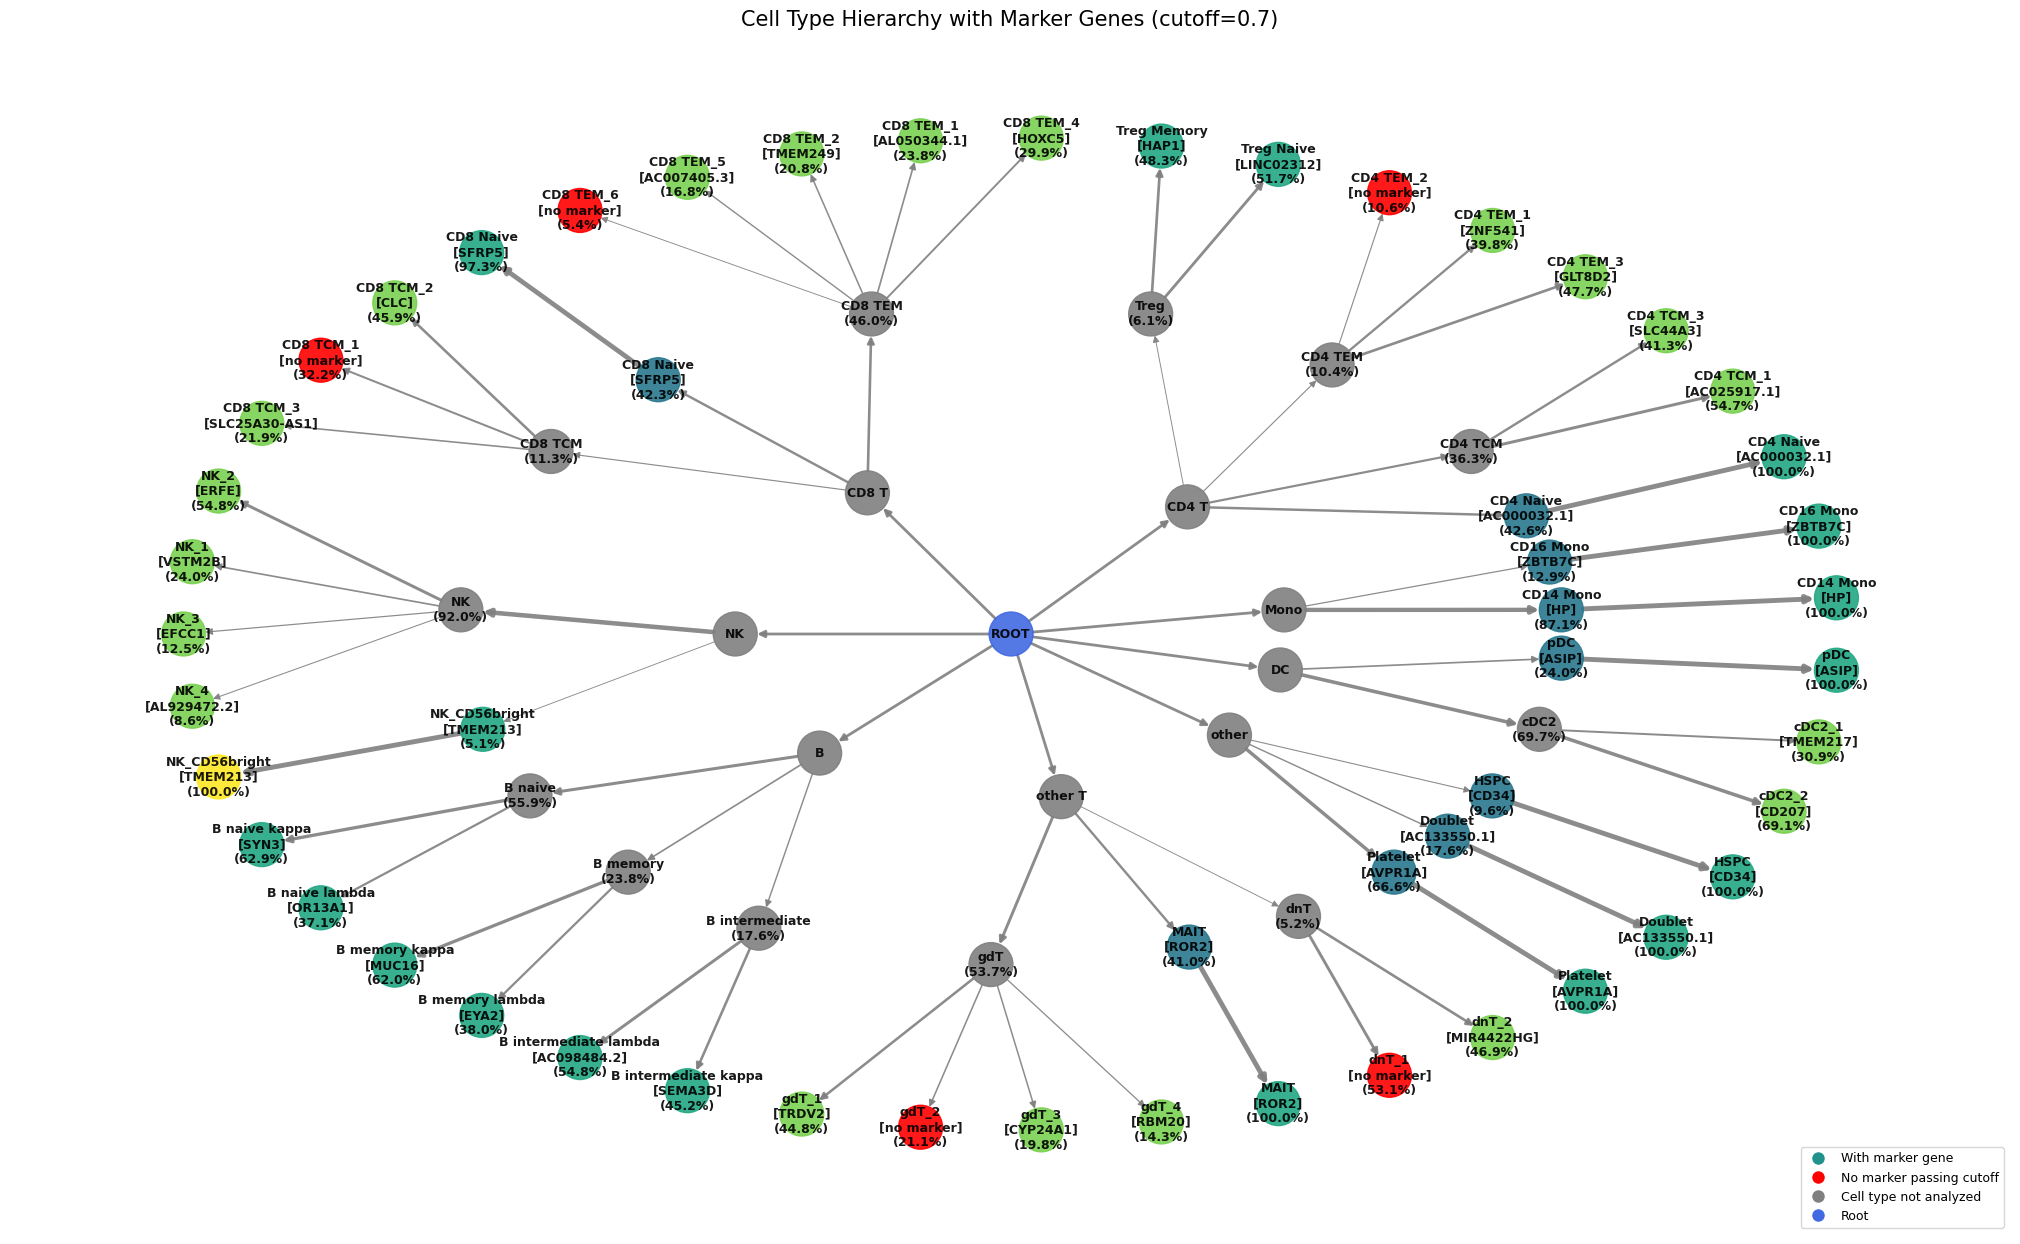

In [10]:
scherlock.visualize_hierarchy_marker(cutoff=0.7)